In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\Angkur\Downloads\Machine Learning\Recommendation system - Python\My Movie Recommendation System/clean_data.csv')

In [3]:
df.head(2)

,Unnamed: 0,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew
0,0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [4]:
df.columns

Index(['Unnamed: 0', 'budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew'],
      dtype='object')

In [5]:
v = df['vote_count']
C = df['vote_average'].mean()
R = df['vote_average']

In [6]:
C

6.092171559442011

In [7]:
df['vote_count']

0       11800
1        4500
2        4466
3        9106
4        2124
        ...  
4798      238
4799        5
4800        6
4801        7
4802       16
Name: vote_count, Length: 4803, dtype: int64

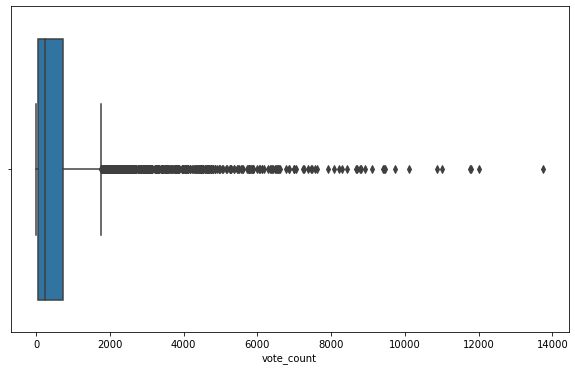

In [9]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(df['vote_count'])

In [12]:
# select those movies that achieve minimum 1900 votes
m = df['vote_count'].quantile(0.9)

In [13]:
m

1838.4000000000015

In [16]:
df['vote_count']>=m

0        True
1        True
2        True
3        True
4        True
        ...  
4798    False
4799    False
4800    False
4801    False
4802    False
Name: vote_count, Length: 4803, dtype: bool

In [17]:
data = df[df['vote_count']>=m]

In [18]:
data.shape

(481, 19)

In [15]:
def weighted_avg_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    
    return ((R*v) + (C*m)) / (v + m)

In [21]:
data['weighted_avg'] = data.apply(weighted_avg_rating, axis=1)

<ipython-input-21-2364e649ffac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['weighted_avg'] = data.apply(weighted_avg_rating, axis=1)


In [22]:
data.shape

(481, 20)

In [23]:
data.head(2)

,Unnamed: 0,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,weighted_avg
0,0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.050669
1,1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.665696


In [25]:
df_sorted_ranking = data.sort_values('weighted_avg', ascending=False)

In [27]:
df_sorted_ranking.head(3) # Top 3 movies

,Unnamed: 0,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,weighted_avg
1881,1881,25000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",278,"[{""id"": 378, ""name"": ""prison""}, {""id"": 417, ""n...",en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,"[{""name"": ""Castle Rock Entertainment"", ""id"": 97}]",1994-09-23,28341469,142.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Fear can hold you prisoner. Hope can set you f...,8.5,8205,"[{""cast_id"": 3, ""character"": ""Andy Dufresne"", ...","[{""credit_id"": ""52fe4231c3a36847f800b153"", ""de...",8.059258
662,662,63000000,"[{""id"": 18, ""name"": ""Drama""}]",550,"[{""id"": 825, ""name"": ""support group""}, {""id"": ...",en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,146.757391,"[{""name"": ""Regency Enterprises"", ""id"": 508}, {...",1999-10-15,100853753,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Mischief. Mayhem. Soap.,8.3,9413,"[{""cast_id"": 4, ""character"": ""The Narrator"", ""...","[{""credit_id"": ""55731b8192514111610027d7"", ""de...",7.939256
65,65,185000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",155,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight,Batman raises the stakes in his war on crime. ...,187.322927,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...",2008-07-16,1004558444,152.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Why So Serious?,8.2,12002,"[{""cast_id"": 35, ""character"": ""Bruce Wayne"", ""...","[{""credit_id"": ""55a0eb4a925141296b0010f8"", ""de...",7.920020


In [28]:
df_sorted_ranking.columns

Index(['Unnamed: 0', 'budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew', 'weighted_avg'],
      dtype='object')

In [31]:
df_sorted_ranking[['original_title', 'vote_average', 'vote_count', 'weighted_avg', 'popularity']].head(15) #Top 15 movies

,original_title,vote_average,vote_count,weighted_avg,popularity
1881,The Shawshank Redemption,8.5,8205,8.059258,136.747729
662,Fight Club,8.3,9413,7.939256,146.757391
65,The Dark Knight,8.2,12002,7.920020,187.322927
3232,Pulp Fiction,8.3,8428,7.904645,121.463076
96,Inception,8.1,13752,7.863239,167.583710
3337,The Godfather,8.4,5893,7.851236,143.659698
95,Interstellar,8.1,10867,7.809479,724.247784
809,Forrest Gump,8.2,7927,7.803188,138.133331
329,The Lord of the Rings: The Return of the King,8.1,8064,7.727243,123.630332
1990,The Empire Strikes Back,8.2,5879,7.697884,78.517830


Text(0, 0.5, 'Movie title')

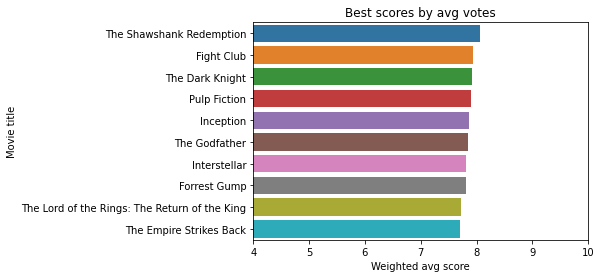

In [33]:
sns.barplot(x=df_sorted_ranking['weighted_avg'].head(10), y=df_sorted_ranking['original_title'].head(10), data=df_sorted_ranking)
plt.xlim(4, 10)
plt.title("Best scores by avg votes")
plt.xlabel('Weighted avg score')
plt.ylabel('Movie title')